# Comparing Temperature Data from 2015 vs 2005-2014

Background: The following notebook was created to complete a project for the University of Michigan Coursera course "Applied Plotting, Charting & Data Representation in Python". I was given a csv with temprature data from 2005-2015 from several National Centers for Enviornmental Information sites taking temprature data near Ann Arbor Michigan. I was asked to create a plot that showed days in 2015 that had more extreme daily tempratures (higher highs or lower lows) than any day between 2005-2014.

# Data Cleaning and Exploration:

In [ ]:
#import Pands:
import pandas as pd

#read in temprature data:
df = pd.read_csv('assets/Temp_data.csv')
df.head()

#Temparture data contains the minimum and maximum temprature recorded by the National Centers for Enviornmental Information
#at a number of different stations in the Ann Arbor Michigan Area.

#We can see the data is formated to include an ID, which is the weather station where the data was taken, the date it was taken,
#the element defines if it was a min or max temprature, and then the temprature in celsius with the final digit represents the temprature to
#to the tenth degree. So the first value I see is 22, which means it is 2.2 degrees C.

,ID,Date,Element,Data_Value
0,USW00094889,2014-11-12,TMAX,22
1,USC00208972,2009-04-29,TMIN,56
2,USC00200032,2008-05-26,TMAX,278
3,USC00205563,2005-11-11,TMAX,139
4,USC00200230,2014-02-27,TMAX,-106


In [472]:
#Format the data:

# re name temprature column and convert a float and divide by 10
df.rename(columns={'Data_Value': 'Temperature'}, inplace=True)
df['Temperature'] = df['Temperature'].astype(float) / 10

#convert date column to date time format
df['Date'] = pd.to_datetime(df['Date'], format='%Y-%m-%d')

#confirm datatypes have been updated properlly
print(df.dtypes)
df.head()

ID                     object
Date           datetime64[ns]
Element                object
Temperature           float64
dtype: object


,ID,Date,Element,Temperature
0,USW00094889,2014-11-12,TMAX,2.2
1,USC00208972,2009-04-29,TMIN,5.6
2,USC00200032,2008-05-26,TMAX,27.8
3,USC00205563,2005-11-11,TMAX,13.9
4,USC00200230,2014-02-27,TMAX,-10.6


In [474]:
#I found it easiest to drop leap years, as this complicated some of the plotting later on.
df = df[~((df['Date'].dt.month == 2) & (df['Date'].dt.day == 29))]

In [476]:
#I would like to split the dataset into 2 sets, one for max and one for minumum to make plotting easier:
df_max = df.loc[df['Element'] == 'TMAX']
df_min = df.loc[df['Element'] == 'TMIN']

#We can drop Element and Location column from each data set
df_max = df_max.drop(columns=['Element', 'ID'])
df_min = df_min.drop(columns=['Element', 'ID'])

In [478]:
#I will group by days to find the mean temprature accross all stations
df_max = df_max.groupby('Date', as_index=False)['Temperature'].mean()
df_min = df_min.groupby('Date', as_index=False)['Temperature'].mean()

In [480]:
#Print the results to sanity check everything. There are 365 days a year (with leap year days removed), so we should have 4015 datapoints for
#the 11 years. I also want to quickly look that temprature values are reasonable
df_min

,Date,Temperature
0,2005-01-01,-3.309524
1,2005-01-02,-1.642105
2,2005-01-03,0.838095
3,2005-01-04,-0.445000
4,2005-01-05,-4.771429
...,...,...
4010,2015-12-27,1.584211
4011,2015-12-28,-1.831579
4012,2015-12-29,-1.077778
4013,2015-12-30,-0.323529


In [482]:
#I would like to compare the 2015 data to the 2005-2014 data, so I will pull the 2015 data out into a seperate dataframe
df_max_2015 = df_max[((df_max['Date'].dt.year == 2015))]
df_min_2015 = df_min[((df_max['Date'].dt.year == 2015))]

#Remove 2015 data from the df
mask_max = df_max['Date'].dt.year != 2015
mask_min = df_min['Date'].dt.year != 2015
df_max = df_max.loc[mask_max]
df_min = df_min.loc[mask_min]

In [484]:
#for the 2005-2014 data I will only look at the extreme value across the 10 years, so I will grab the maximum max value, and the minimum min value
#for each year.

#I will remove the year from each dataframe, as I will only be looking at days and months
df_max['Date'] = df_max['Date'].dt.strftime('%m-%d')
df_min['Date'] = df_min['Date'].dt.strftime('%m-%d')
df_max_2015['Date'] = df_max_2015['Date'].dt.strftime('%m-%d')
df_min_2015['Date'] = df_min_2015['Date'].dt.strftime('%m-%d')

#With the year removed I can now group by the date for the 2005-2014 data.
df_max = df_max.groupby('Date', as_index=False)['Temperature'].max()
df_min = df_min.groupby('Date', as_index=False)['Temperature'].min()

#I will check my work by confirming there are 365 tempratures for each dataset
print(len(df_max))
print(len(df_min))
print(len(df_max_2015))
print(len(df_min_2015))

365
365
365
365


C:\Users\z004787n\AppData\Local\Temp\ipykernel_25848\4099514254.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_min['Date'] = df_min['Date'].dt.strftime('%m-%d')
C:\Users\z004787n\AppData\Local\Temp\ipykernel_25848\4099514254.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_min_2015['Date'] = df_min_2015['Date'].dt.strftime('%m-%d')


# Plotting

In [426]:
#import plotting libraries
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

In [486]:
# I will first isolate the values from 2015 that are outside of the 2005-2014 range:
df_max_2015.reset_index(drop=True, inplace=True)
df_max_2015_filtered = df_max_2015[df_max_2015['Temperature'] > df_max['Temperature']]

df_min_2015.reset_index(drop=True, inplace=True)
df_min_2015_filtered = df_min_2015[df_min_2015['Temperature'] < df_min['Temperature']]

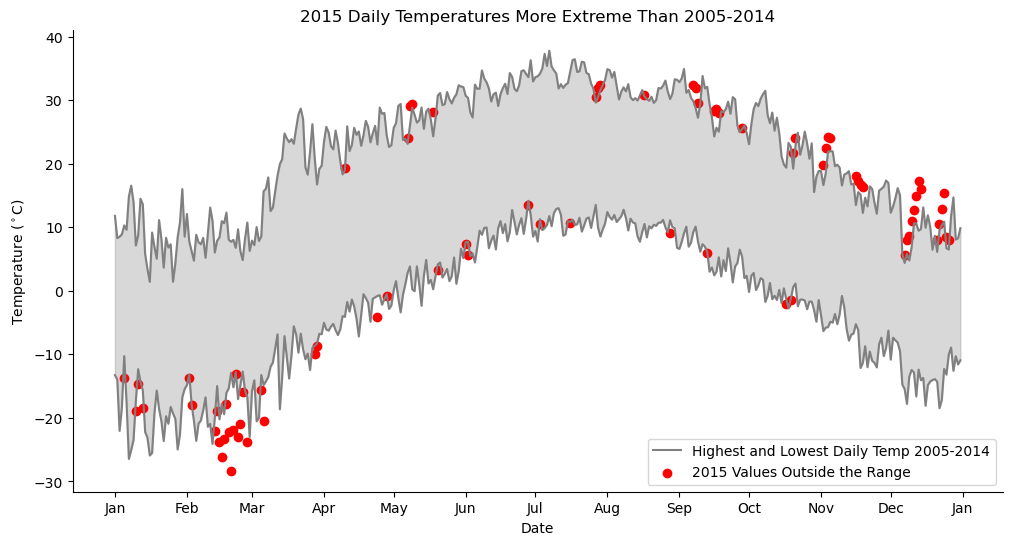

In [488]:
#Set the plot size, I want a longer shorter plot
plt.figure(figsize=(12,6))

#Plot the max and min 2005-2014 data as a line graph
plt.plot(df_max['Date'], df_max['Temperature'], label='Highest and Lowest Daily Temp 2005-2014', color='gray')
plt.plot(df_min['Date'], df_min['Temperature'], color='gray')
#Shade in the area in between the plots
plt.fill_between(df_max['Date'], df_max['Temperature'], df_min['Temperature'], color='gray', alpha=0.3)

#Plot all of the points from 2015 that are outside of the 2005-2014 range.
#For ease of understanding I have colored these red to pop out to the viewer
plt.scatter(df_max_2015_filtered['Date'],df_max_2015_filtered['Temperature'], label='2015 Values Outside the Range', color='red')
plt.scatter(df_min_2015_filtered['Date'],df_min_2015_filtered['Temperature'], color='red')

#Format plot:

# Set major ticks to be at the start of each month
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
# Set the format of the major ticks to show the month name
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b'))

# Remove the top and right spines
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

#Assign labels
plt.xlabel('Date')
plt.ylabel(r'Temperature ($^\circ$C)')
plt.title('2015 Daily Temperatures More Extreme Than 2005-2014')
plt.legend(loc='lower right')

#Optional, Export the graph as a png
plt.savefig('Temp_Plot.png')

plt.show()